California Housing Price Prediction - Linear Regression from Scratch
Dataset Shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: House prices in hundreds of thousands of dollars

First few samples:
X shape: (20640, 8), y shape: (20640,)

Dataset Info:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
Dataset Statistics:
             MedInc      HouseAge      AveRooms     AveB

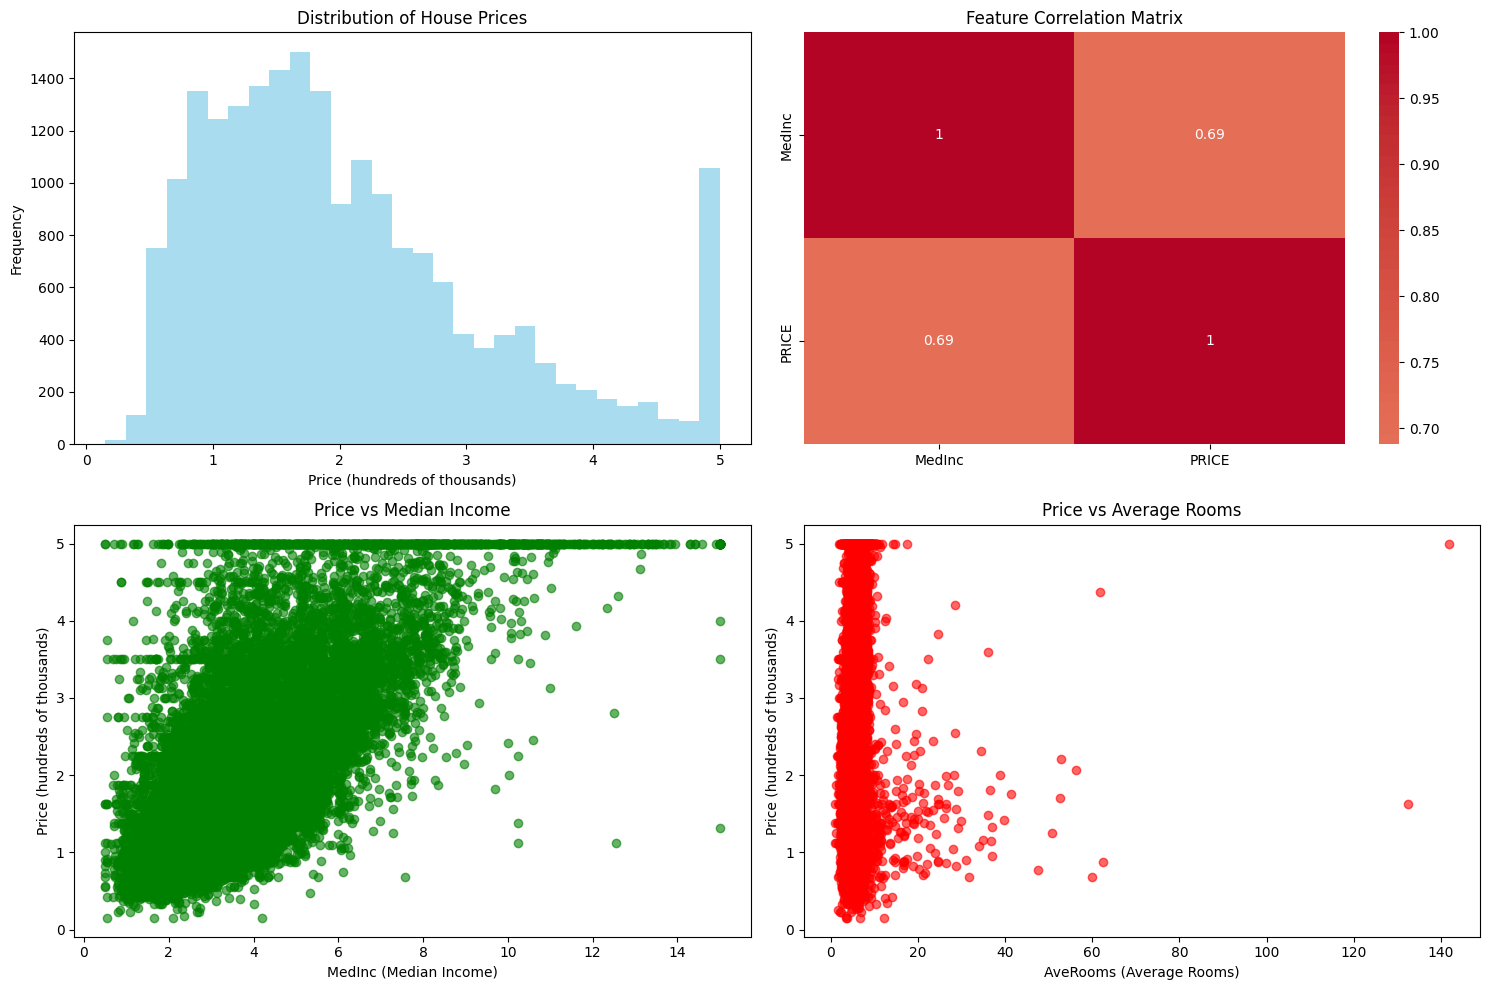

Training set size: 16512
Test set size: 4128
Features after scaling and bias: 9
Training Linear Regression from Scratch...
Training completed!
Final parameters shape: (9,)
Training Performance:
MSE: 0.55
RMSE: 0.74
MAE: 0.54
R² Score: 0.590

Test Performance:
MSE: 0.57
RMSE: 0.75
MAE: 0.55
R² Score: 0.567


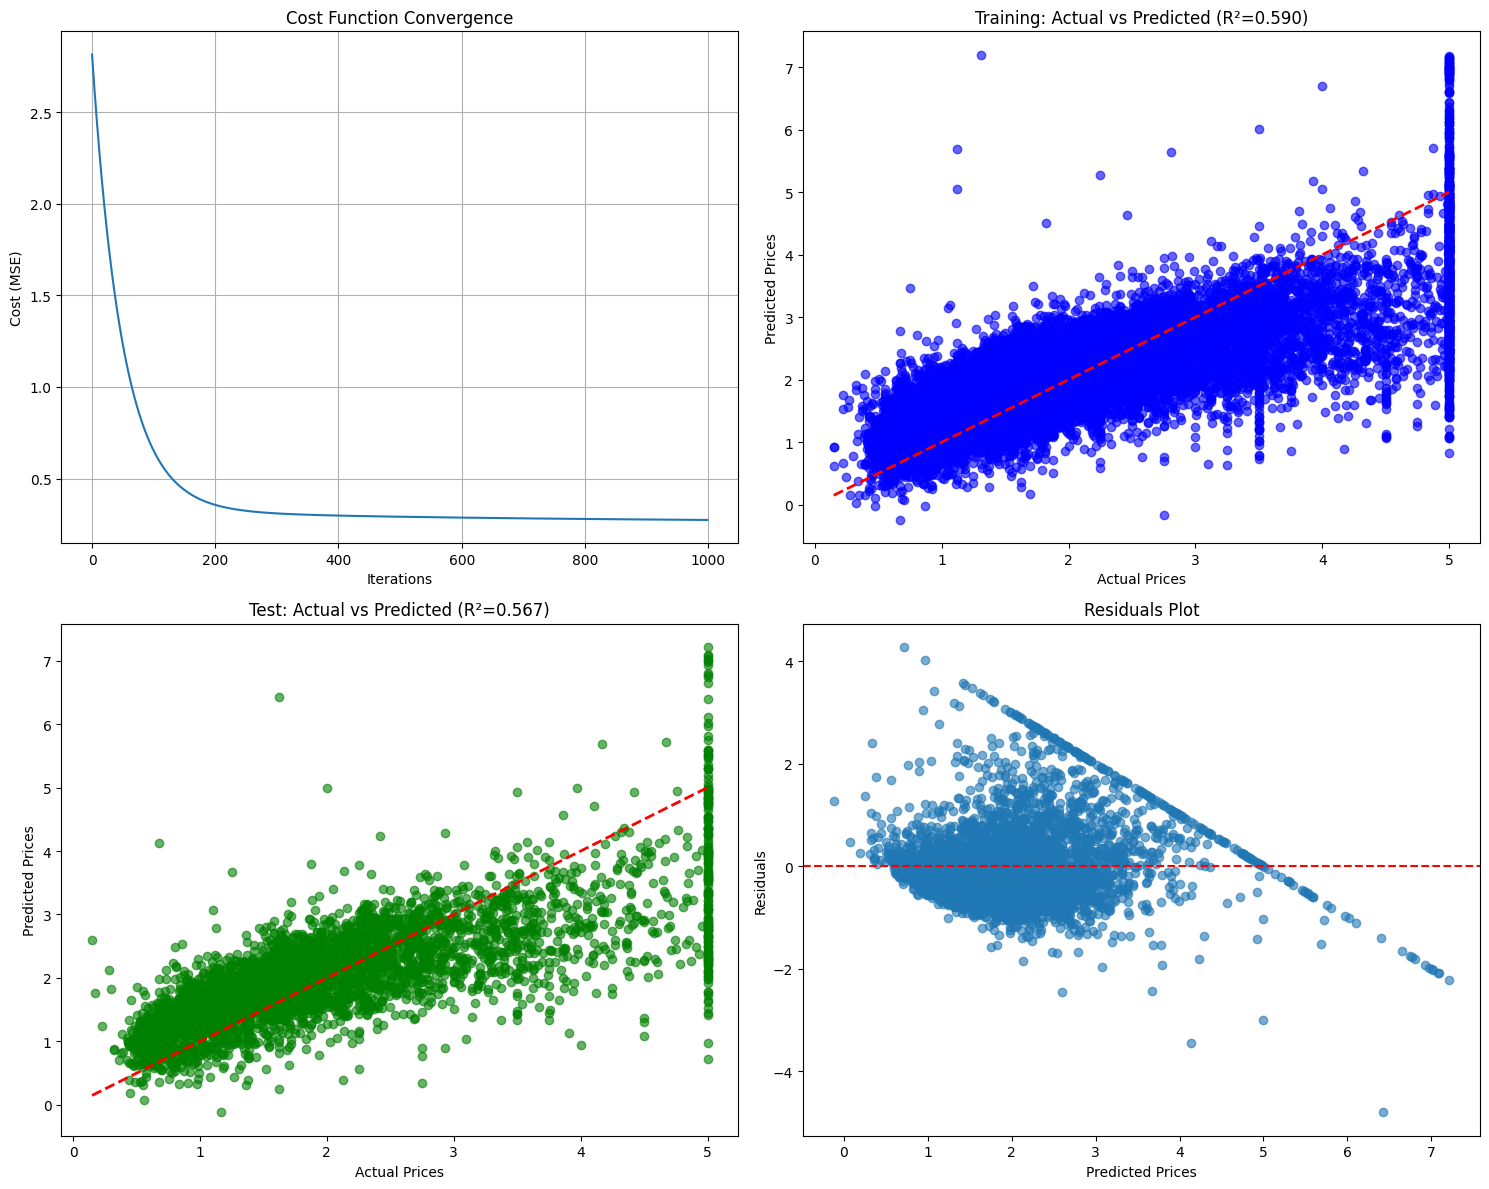

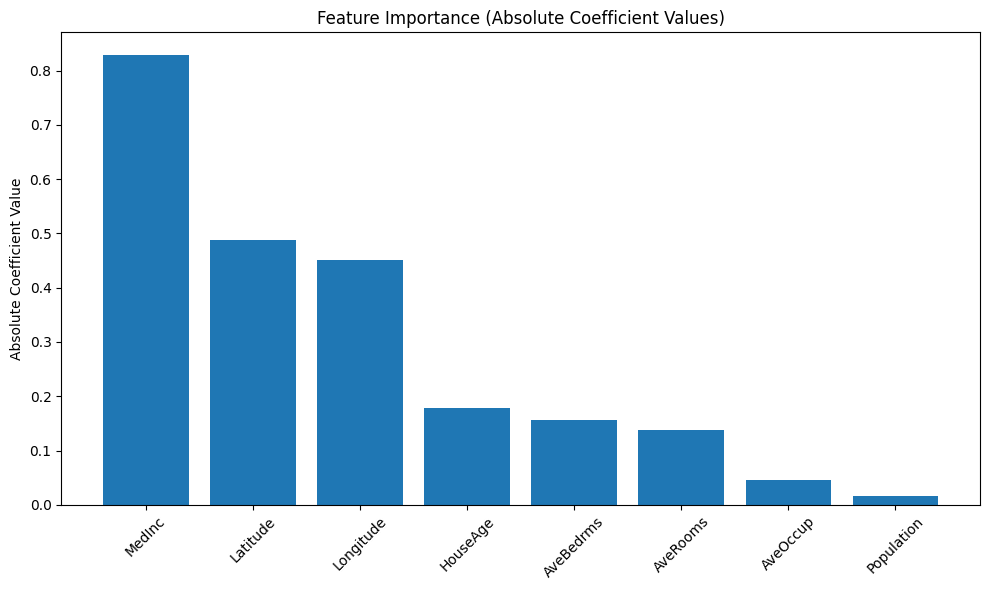

🏠 CALIFORNIA HOUSING PRICE PREDICTION - PROJECT SUMMARY
📊 Dataset: 20640 houses with 8 features
🎯 Algorithm: Linear Regression with Gradient Descent
🔄 Training: 1000 iterations
📈 Final Test R² Score: 0.567
💰 Average Prediction Error: $0.75 (hundreds of thousands)

🔑 Key Learnings:
• Implemented linear regression from mathematical principles
• Applied gradient descent optimization algorithm
• Understood importance of feature scaling
• Learned to evaluate model performance with multiple metrics

🚀 Most Important Features:
1. MedInc: 0.829
2. Latitude: 0.487
3. Longitude: 0.451
4. HouseAge: 0.179
5. AveBedrms: 0.157


In [6]:
# Cell 1: Import Libraries and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("California Housing Price Prediction - Linear Regression from Scratch")
print("=" * 60)

# Cell 2: Load and Explore Data
# Load California Housing Dataset (more ethical alternative)
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

print(f"Dataset Shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Target: House prices in hundreds of thousands of dollars")
print("\nFirst few samples:")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Create DataFrame for easier handling
df = pd.DataFrame(X, columns=feature_names)
df['PRICE'] = y
print(f"\nDataset Info:")
print(df.head())

# Cell 3: Data Analysis and Visualization
# Basic statistics
print("Dataset Statistics:")
print(df.describe())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price distribution
axes[0,0].hist(y, bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of House Prices')
axes[0,0].set_xlabel('Price (hundreds of thousands)')
axes[0,0].set_ylabel('Frequency')

# Correlation heatmap
corr_matrix = df.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix['PRICE']) > 0.5]
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', center=0, ax=axes[0,1])
axes[0,1].set_title('Feature Correlation Matrix')

# Price vs MedInc (most correlated feature)
axes[1,0].scatter(df['MedInc'], df['PRICE'], alpha=0.6, color='green')
axes[1,0].set_xlabel('MedInc (Median Income)')
axes[1,0].set_ylabel('Price (hundreds of thousands)')
axes[1,0].set_title('Price vs Median Income')

# Price vs AveRooms (average rooms)
axes[1,1].scatter(df['AveRooms'], df['PRICE'], alpha=0.6, color='red')
axes[1,1].set_xlabel('AveRooms (Average Rooms)')
axes[1,1].set_ylabel('Price (hundreds of thousands)')
axes[1,1].set_title('Price vs Average Rooms')

plt.tight_layout()
plt.show()

# Cell 4: Data Preprocessing
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature Scaling (important for gradient descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (intercept)
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

print(f"Features after scaling and bias: {X_train_scaled.shape[1]}")

# Cell 5: Linear Regression Implementation from Scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.costs = []

    def fit(self, X, y):
        # Initialize parameters
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)

        # Gradient Descent
        for i in range(self.n_iterations):
            # Forward propagation
            y_pred = self.predict(X)

            # Cost calculation (MSE)
            cost = (1/(2*self.m)) * np.sum((y_pred - y)**2)
            self.costs.append(cost)

            # Backward propagation (gradients)
            dJ_dtheta = (1/self.m) * X.T.dot(y_pred - y)

            # Update parameters
            self.theta = self.theta - self.learning_rate * dJ_dtheta

    def predict(self, X):
        return X.dot(self.theta)

    def get_cost_history(self):
        return self.costs

# Train the model
print("Training Linear Regression from Scratch...")
model = LinearRegressionScratch(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

print("Training completed!")
print(f"Final parameters shape: {model.theta.shape}")

# Cell 6: Model Evaluation
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    return mse, rmse, mae, r2

# Training metrics
train_mse, train_rmse, train_mae, train_r2 = calculate_metrics(y_train, y_train_pred)
print("Training Performance:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R² Score: {train_r2:.3f}")

print("\n" + "="*40)

# Test metrics
test_mse, test_rmse, test_mae, test_r2 = calculate_metrics(y_test, y_test_pred)
print("Test Performance:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R² Score: {test_r2:.3f}")

# Cell 7: Results Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Cost function convergence
axes[0,0].plot(model.get_cost_history())
axes[0,0].set_title('Cost Function Convergence')
axes[0,0].set_xlabel('Iterations')
axes[0,0].set_ylabel('Cost (MSE)')
axes[0,0].grid(True)

# Training predictions vs actual
axes[0,1].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0,1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual Prices')
axes[0,1].set_ylabel('Predicted Prices')
axes[0,1].set_title(f'Training: Actual vs Predicted (R²={train_r2:.3f})')

# Test predictions vs actual
axes[1,0].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Actual Prices')
axes[1,0].set_ylabel('Predicted Prices')
axes[1,0].set_title(f'Test: Actual vs Predicted (R²={test_r2:.3f})')

# Residuals plot
residuals = y_test - y_test_pred
axes[1,1].scatter(y_test_pred, residuals, alpha=0.6)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted Prices')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()

# Feature importance (absolute values of coefficients)
feature_importance = np.abs(model.theta[1:])  # Exclude bias term
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Cell 8: Key Insights and Conclusions
print("🏠 CALIFORNIA HOUSING PRICE PREDICTION - PROJECT SUMMARY")
print("=" * 60)
print(f"📊 Dataset: {X.shape[0]} houses with {X.shape[1]} features")
print(f"🎯 Algorithm: Linear Regression with Gradient Descent")
print(f"🔄 Training: {model.n_iterations} iterations")
print(f"📈 Final Test R² Score: {test_r2:.3f}")
print(f"💰 Average Prediction Error: ${test_rmse:.2f} (hundreds of thousands)")
print()
print("🔑 Key Learnings:")
print("• Implemented linear regression from mathematical principles")
print("• Applied gradient descent optimization algorithm")
print("• Understood importance of feature scaling")
print("• Learned to evaluate model performance with multiple metrics")
print()
print("🚀 Most Important Features:")
top_features = sorted_idx[:5]
for i, idx in enumerate(top_features):
    print(f"{i+1}. {feature_names[idx]}: {feature_importance[idx]:.3f}")